<a href="https://colab.research.google.com/github/kolattukudy/InteractiveBrokers-PairsTrading-Algo/blob/master/volatality_trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import datetime
import os

import pandas
import numpy
import statsmodels.api as sm
import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from google.colab import drive
drive.mount('/volatility-trading-master/',force_remount=True)
import sys
sys.path.append('/volatility-trading-master/MyDrive/volatility-trading-master/volatility')
from volatility import models



Mounted at /volatility-trading-master/


In [29]:
import pathlib
pathlib.Path().absolute()


PosixPath('/content')

In [30]:
from volatility  import volest
from volatility import data

# data
symbol = 'JPM'
bench = '^GSPC'
data_file_path = '/volatility-trading-master/MyDrive/volatility-trading-master/tests/JPM.csv'
bench_file_path = '/volatility-trading-master/MyDrive/volatility-trading-master/tests/BENCH.csv'
estimator = 'GarmanKlass'


# estimator windows
window = 30
windows = [30, 60, 90, 120]
quantiles = [0.25, 0.75]
bins = 100
normed = True

#


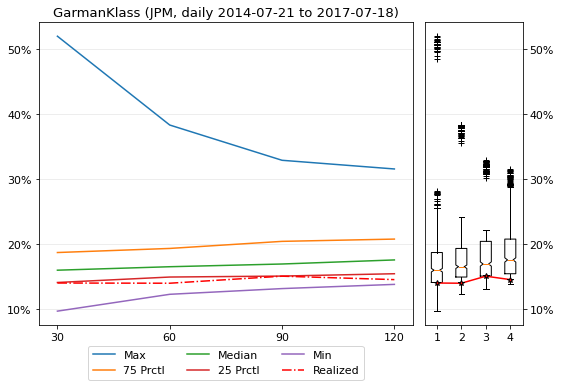

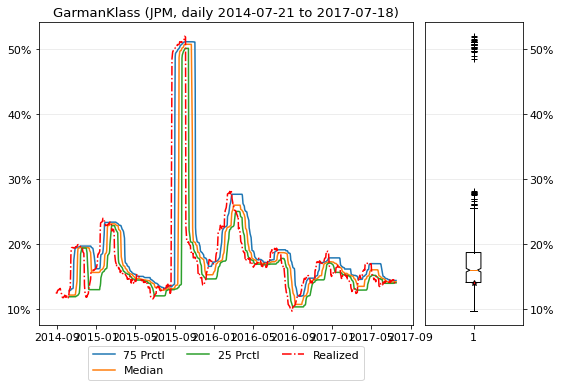

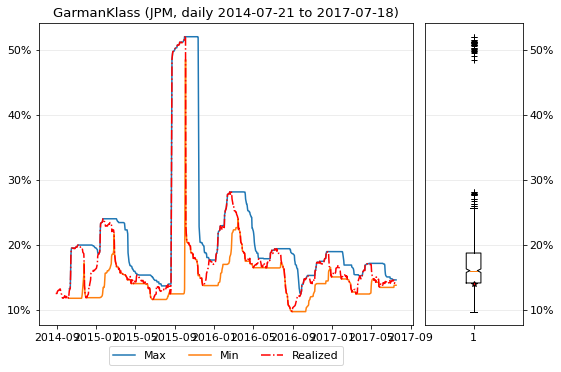

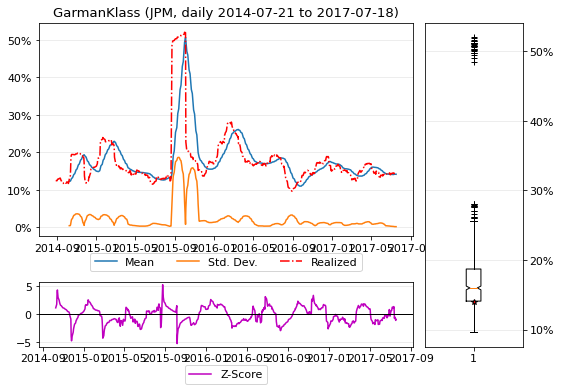

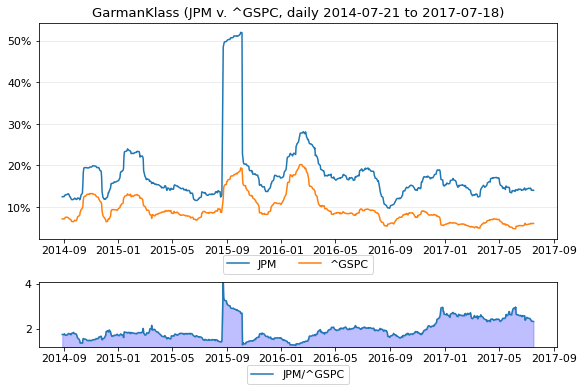

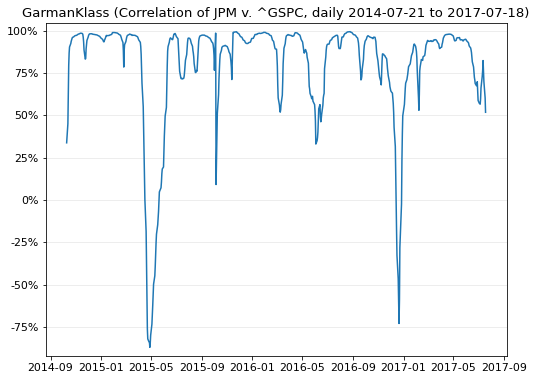

In [48]:
#use the yahoo helper to correctly format data from finance.yahoo.com
jpm_price_data = data.yahoo_helper(symbol, data_file_path)
spx_price_data = data.yahoo_helper(bench, bench_file_path)

# initialize class
vol = volest.VolatilityEstimator(
    price_data=jpm_price_data,
    estimator=estimator,
    bench_data=spx_price_data
)

# call plt.show() on any of the below...
_, plt = vol.cones(windows=windows, quantiles=quantiles)
_, plt = vol.rolling_quantiles(window=window, quantiles=quantiles)
_, plt = vol.rolling_extremes(window=window)
_, plt = vol.rolling_descriptives(window=window)
#_, plt = vol.histogram(window=window, bins=bins)

_, plt = vol.benchmark_compare(window=window)
_, plt = vol.benchmark_correlation(window=window)

# ... or create a pdf term sheet with all metrics in term-sheets/
#vol.term_sheet(window, windows,quantiles, bins,)